# **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import calendar
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from wordcloud import WordCloud
from IPython.display import display, HTML
import plotly.express as px




# **Load data**

In [ ]:
data_path='/content/OnlineRetail.xlsx'
df=pd.read_excel(data_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(541909, 8)

In [ ]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Description and CustomerID have null values and CustomerID has data type as float 64








# **Data Preprocessing**

In this section, I will:

*  **CustomerID**

1.   Change dtype to string
2.   Fill all the missing value with "GuestCustomer"

*   **Description**

1.   Remove white spaces
2.   Remove missing values
3.   Remove rows having a product description that has a length less than or equal to 8 characters.This is because the description is not actually products. Below is a sample of some of these descriptions
['wet?','Damaged','Missing','Discount','lost','MIA','SAMPLES','Display','mailout ','?','missing?','broken','lost??','CARRIAGE','mouldy','smashed']
4.   Drop the special case row with description '20713'
5.   Remove rows which have description "DOTCOM POSTAGE". Because this is a term in E-commerce field that refers to the shipping fee for delivering goods from an online store to customers.

*   **StockCode**

1.   Remove white space

*   **InvoiceNo**

1.   Remove white space
2.   Change dtype to string
3.   Remove rows that have 'InvoiceNo' starting with letter 'C'. Because they refer to cancelled orders  

*   **Quantity**

1.   Remove rows that have quantity less than or equal to 0

*   **Others**

1.    Remove and consolidate duplicated entries in the product description that have the same stockcode.
2.    Create 'SaleRevenue' column by multiplying the 'Quantity' and 'UnitPrice'
3.    Create columns relating to date and time
4.    Focus on analyzing transactions in 2011, so remove all transactions created in 2010




















   








In [ ]:
df["CustomerID"] = df["CustomerID"].fillna(0)
df["CustomerID"] = df["CustomerID"].astype(int)
df["CustomerID"] = df["CustomerID"].astype(str)
df["CustomerID"] = df["CustomerID"].replace('0','Guest Customer')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
guest_customer_rows = df.loc[df['CustomerID'] == 'Guest Customer']
print(guest_customer_rows)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice      CustomerID         Country  
622    2010-12-01 11:52:00       0.00  Guest Custom

In [ ]:
df['Description']=df['Description'].str.replace('.','').str.upper().str.strip()
df['Description']=df['Description'].replace('\s+',' ',regex=True)
df = df.dropna(subset=['Description'])
df.drop(df[df['Description'].str.len() <= 8].index, inplace=True)
df.drop(df[df['Description'] == '20713'].index, inplace=True)
df.drop(df[df['Description'] == "DOTCOM POSTAGE"].index, inplace=True)
df.drop(df[df['Description'] == "ADJUST BAD DEBT"].index, inplace=True)
df.drop(df[df['Description'] == "FOUND BY JACKIE"].index, inplace=True)
df.drop(df[df['Description'] == "RE-ADJUSTMENT"].index, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence '\s'
<>:2: DeprecationWarning: invalid escape sequence '\s'
<ipython-input-10-5d7f3dcece41>:2: DeprecationWarning: invalid escape sequence '\s'
  df['Description']=df['Description'].replace('\s+',' ',regex=True)


In [ ]:
df['StockCode']=df['StockCode'].replace('\s+',' ',regex=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence '\s'
<>:1: DeprecationWarning: invalid escape sequence '\s'
<ipython-input-11-4c56fd3cfb8c>:1: DeprecationWarning: invalid escape sequence '\s'
  df['StockCode']=df['StockCode'].replace('\s+',' ',regex=True)


In [ ]:
df['InvoiceNo']=df['InvoiceNo'].replace('\s+',' ',regex=True)
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df = df[~df['InvoiceNo'].str.startswith('C')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence '\s'
<>:1: DeprecationWarning: invalid escape sequence '\s'
<ipython-input-12-0eab391b4221>:1: DeprecationWarning: invalid escape sequence '\s'
  df['InvoiceNo']=df['InvoiceNo'].replace('\s+',' ',regex=True)


In [ ]:
df.drop(df[(df['Quantity']<=0)] .index, inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.reset_index(drop=True, inplace=True)

the_dict = {}
for index, row in df.iterrows():
    code = row['StockCode']
    description = row['Description']
    if code not in the_dict:
        the_dict[code] = []
    if description not in the_dict[code]:
        the_dict[code].append(description)

dict_to_look_at = {key: value for key, value in the_dict.items() if len(value) > 1}

for key, value in dict_to_look_at.items():
    max_len = 0
    index = 0
    for i, desc in enumerate(value):
        if len(desc.split()) >= max_len:
            max_len = len(desc.split())
            index = i
    dict_to_look_at[key] = value[index]

for key, value in dict_to_look_at.items():
    df.loc[df['StockCode'] == key, 'Description'] = value


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['SaleRevenue']=df['Quantity']*df['UnitPrice']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['Date']=df['InvoiceDate'].dt.date
df['Month']=df['InvoiceDate'].dt.month
df['Year']=df['InvoiceDate'].dt.year
df['Month']=df['Month'].apply(lambda x: calendar.month_name[int(x)])
df['Week of the Year'] = df['InvoiceDate'].dt.isocalendar().week
df['Day of Week']=df['InvoiceDate'].dt.day_name()
df['Time of Day']=pd.cut(df['InvoiceDate'].dt.hour,[0,6,12,18,23], labels=['Night','Morning','Afternoon','Evening'], include_lowest=True)
df["Hour"] = df['InvoiceDate'].dt.hour

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.drop(df[df['Year']==2010].index, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleRevenue,Date,Month,Year,Week of the Year,Day of Week,Time of Day,Hour
41448,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.5,2011-01-04,January,2011,1,Tuesday,Morning,10
41449,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5,2011-01-04,January,2011,1,Tuesday,Morning,10
41450,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5,2011-01-04,January,2011,1,Tuesday,Morning,10
41451,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,10.5,2011-01-04,January,2011,1,Tuesday,Morning,10
41452,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,12.5,2011-01-04,January,2011,1,Tuesday,Morning,10


In [ ]:
df=df[df['Country']=="United Kingdom"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(445183, 16)

In [ ]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Index: 445183 entries, 41448 to 528195
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         445183 non-null  object        
 1   StockCode         445183 non-null  object        
 2   Description       445183 non-null  object        
 3   Quantity          445183 non-null  int64         
 4   InvoiceDate       445183 non-null  datetime64[ns]
 5   UnitPrice         445183 non-null  float64       
 6   CustomerID        445183 non-null  object        
 7   Country           445183 non-null  object        
 8   SaleRevenue       445183 non-null  float64       
 9   Date              445183 non-null  object        
 10  Month             445183 non-null  object        
 11  Year              445183 non-null  int32         
 12  Week of the Year  445183 non-null  UInt32        
 13  Day of Week       445183 non-null  object        
 14  Time 

# **EDA**

In [ ]:
def group_Quantity_and_SalesRevenue(df,string):
    """
    This function inputs the main data frame and feature name
    The feature name is the column name that you want to group the Quantity and Sales Revenue
    """

    df = df[[f'{string}','Quantity','SaleRevenue']].groupby([f'{string}']).sum().sort_values(by= 'SaleRevenue', ascending = False).reset_index()

    return df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sale Analysis

Monthly

In [ ]:
temp_df = group_Quantity_and_SalesRevenue(df,'Month')
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
subplot_titles=("Quantity", "Sales Revenue")
                  )

fig.add_trace(go.Bar(x=temp_df['Month'], y=temp_df['Quantity'],name = 'Quantity',marker_color='#0f62fe'),1, 1)

fig.add_trace(go.Bar(x=temp_df['Month'], y=temp_df['SaleRevenue'],name = 'SaleRevenue',marker_color='#936BFF'),1, 2)

fig.update_layout(showlegend=False, title_text="Monthly Sales Revenue and Quantity")

fig.show( height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=("Quantity per Month", "Sales Revenue per Month")
                    )

fig.add_trace(
    go.Pie(values = temp_df['Quantity'], labels = temp_df['Month'],
    name = 'Quantity'),
    row=1, col=1
)
fig.add_trace(
    go.Pie(values = temp_df['SaleRevenue'], labels = temp_df['Month'],
    name = 'SaleRevenue'),
    row=1, col=2
)
fig.update_layout(title_text="Percentage pie charts for Monthly Sales Revenue and Quantity")

fig.show( height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Weekly

In [ ]:
temp_df = group_Quantity_and_SalesRevenue(df,'Week of the Year')
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                  subplot_titles=("Quantity", "Sales Revenue")
                        )

fig.add_trace(go.Bar(x=temp_df['Week of the Year'], y=temp_df['Quantity'],name = 'Quantity',marker_color='#0f62fe'),1, 1)

fig.add_trace(go.Bar(x=temp_df['Week of the Year'], y=temp_df['SaleRevenue'],name = 'Sales Revenue',marker_color='#936BFF'),1, 2)

fig.update_layout(showlegend=False, title_text="Weekly Sales Revenue and Quantity")

fig.show( height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
temp_df = group_Quantity_and_SalesRevenue(df,'Day of Week')
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                  subplot_titles=("Quantity", "Sales Revenue")
                        )

fig.add_trace(go.Bar(x=temp_df['Day of Week'], y=temp_df['Quantity'],name = 'Quantity',marker_color='#0f62fe'),1, 1)

fig.add_trace(go.Bar(x=temp_df['Day of Week'], y=temp_df['SaleRevenue'],name = 'Sales Revenue',marker_color='#936BFF'),1, 2)

fig.update_layout(coloraxis=dict(colorscale='Greys'), showlegend=False, title_text="Day of the Week Sales Revenue and Quantity")

fig.show( height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=("Quantity", "Sales Revenue")
                    )

fig.add_trace(
    go.Pie(values = temp_df['Quantity'], labels = temp_df['Day of Week'],
    name = 'Quantity'),
    row=1, col=1
)
fig.add_trace(
    go.Pie(values = temp_df['SaleRevenue'], labels = temp_df['Day of Week'],
    name = 'Sales Revenue'),
    row=1, col=2
)
fig.update_layout(title_text="Percentage pie charts for Day of the Week Sales Revanue and Quantity")

fig.show( height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
temp_df = group_Quantity_and_SalesRevenue(df,'Time of Day')
fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=("Quantity", "Sales Revenue")
                    )
colors = ["#936BFF", "#FBE4FE", "#CBD0FE", "#4A44F2"]

fig.add_trace(
    go.Pie(values = temp_df['Quantity'], labels = temp_df['Time of Day'],
    name = 'Quantity',marker=dict(colors=colors)),
    row=1, col=1
)
fig.add_trace(
    go.Pie(values = temp_df['SaleRevenue'], labels = temp_df['Time of Day'],
    name = 'Sales Revenue',marker=dict(colors=colors)),
    row=1, col=2
)
fig.update_layout(title_text="Percentage pie charts for Time of Day Sales Revenue and Quantity")


fig.show( height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Product Analysis

In [ ]:
def wordcloud_of_Description(df, title):
    """
    This fuction creates a word cloud
    inputs a data frame converts it to tuples and uses the input 'title' as the title of the word cloud
    """
    plt.rcParams["figure.figsize"] = (20,20)
    tuples = [tuple(x) for x in df.values]
    wordcloud = WordCloud(background_color='#002d9c').generate_from_frequencies(dict(tuples))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.show()


def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Word Cloud of Production Descriptions per Quantity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



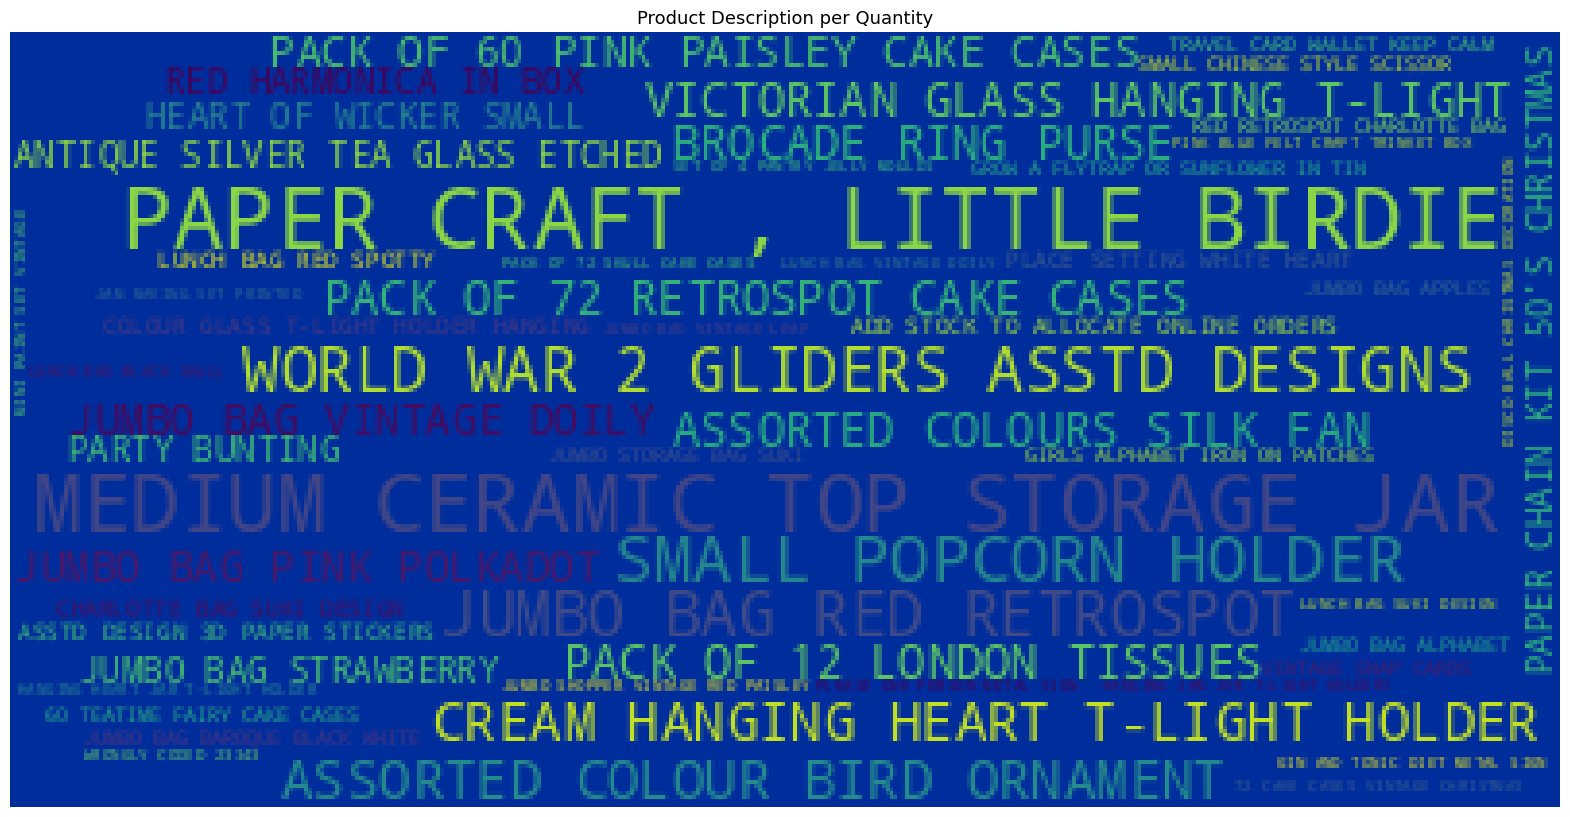

In [ ]:
temp_df = pd.DataFrame(df.groupby('Description')['Quantity'].sum()).reset_index()
title = "Product Description per Quantity"
wordcloud_of_Description(temp_df, title)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



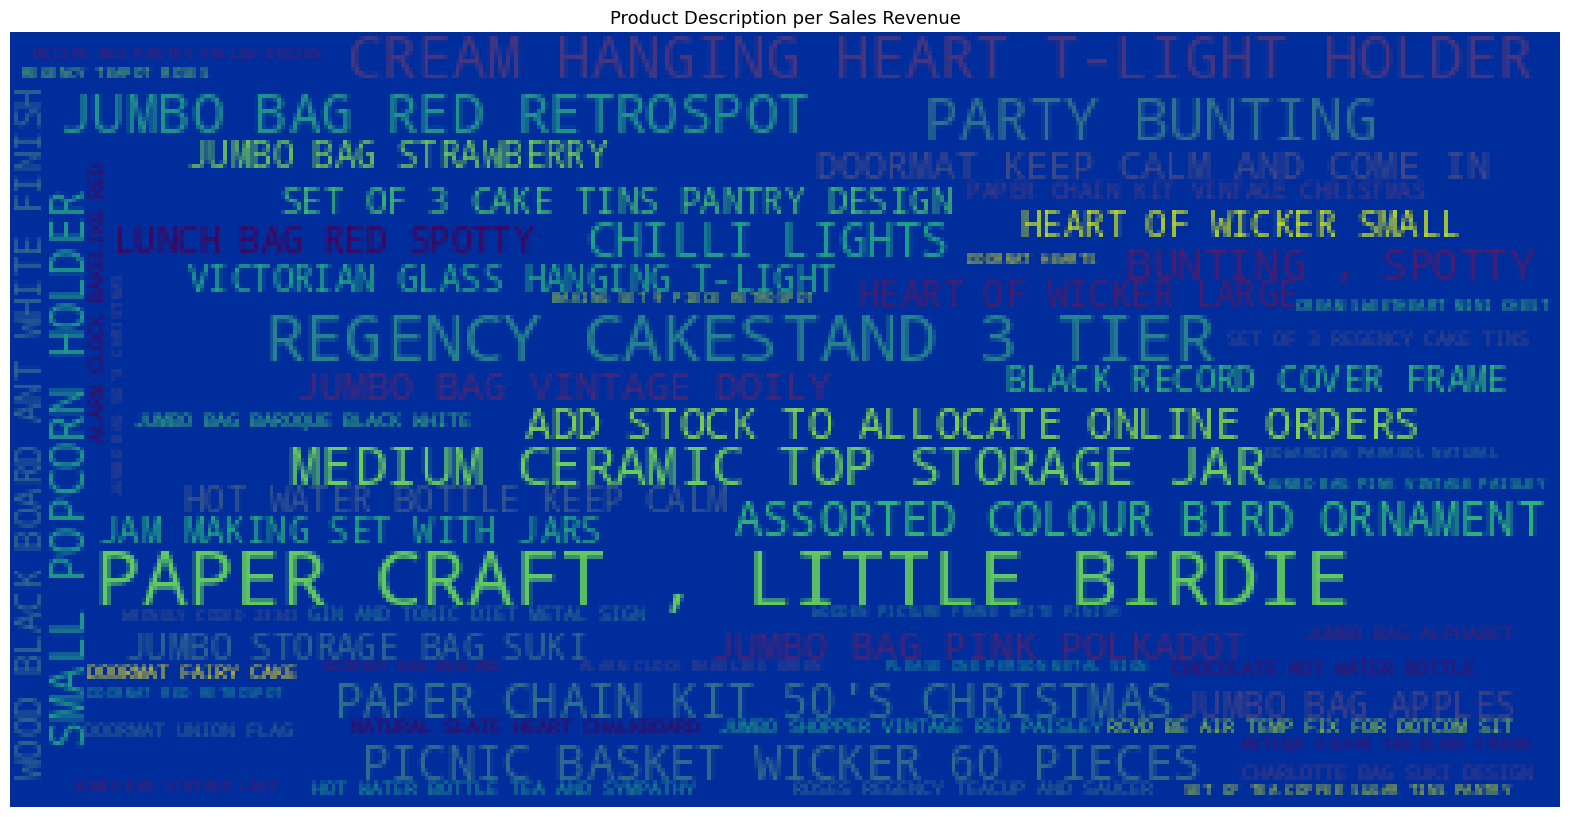

In [ ]:
temp_df = pd.DataFrame(df.groupby('Description')['SaleRevenue'].sum()).reset_index()
title = "Product Description per Sales Revenue"
wordcloud_of_Description(temp_df, title)

In [ ]:
top_products = df.sort_values(by='UnitPrice', ascending=False)[['Description', 'UnitPrice']].head(11)
print(top_products)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



                           Description  UnitPrice
216560  PICNIC BASKET WICKER 60 PIECES     649.50
216559  PICNIC BASKET WICKER 60 PIECES     649.50
130489    VINTAGE BLUE KITCHEN CABINET     295.00
200108     VINTAGE RED KITCHEN CABINET     295.00
166475    VINTAGE BLUE KITCHEN CABINET     295.00
115675    VINTAGE BLUE KITCHEN CABINET     295.00
80626      VINTAGE RED KITCHEN CABINET     295.00
50341      VINTAGE RED KITCHEN CABINET     295.00
131984                      AMAZON FEE     219.76
111824   LOVE SEAT ANTIQUE WHITE METAL     195.00
214264   LOVE SEAT ANTIQUE WHITE METAL     195.00


In [ ]:
temp_df = group_Quantity_and_SalesRevenue(df,'Month')
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                  subplot_titles=("Quantity", "SaleRevenue")
                  )

fig.add_trace(go.Bar(x=temp_df['Month'], y=temp_df['Quantity'],name = 'Quantity', marker_color='#0f62fe'),1, 1)

fig.add_trace(go.Bar(x=temp_df['Month'], y=temp_df['SaleRevenue'],name = 'SaleRevenue',marker_color='#936BFF'),1, 2)

fig.update_layout(showlegend=False, title_text="Monthly Sales Revenue and Quantity")
fig.show( height=700, width=1200)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
temp_df = group_Quantity_and_SalesRevenue(df, 'Description')
Quantity_tempA = temp_df.sort_values(ascending=False, by = "Quantity").head(10).reset_index(drop=True)
Quantity_tempB = temp_df.sort_values(ascending=False, by = "Quantity").tail(10).reset_index(drop=True)

Quantity_tempA.drop('SaleRevenue', axis=1, inplace=True)
Quantity_tempB.drop('SaleRevenue', axis=1, inplace=True)
display_side_by_side([Quantity_tempA, Quantity_tempB], ['Top 10 Description by Quantity\n', 'Bottom 10 Description by Quantity\n'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,77036
2,SMALL POPCORN HOLDER,50869
3,WORLD WAR 2 GLIDERS ASSTD DESIGNS,44955
4,JUMBO BAG RED RETROSPOT,42206
5,CREAM HANGING HEART T-LIGHT HOLDER,31879
6,ASSORTED COLOUR BIRD ORNAMENT,31532
7,PACK OF 12 LONDON TISSUES,22733
8,VICTORIAN GLASS HANGING T-LIGHT,22337
9,PACK OF 72 RETROSPOT CAKE CASES,21720


In [ ]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                  subplot_titles=("Top 10 Product", "Bottom 10 Products")
                        )

fig.add_trace(go.Bar(x=Quantity_tempA['Description'], y=Quantity_tempA['Quantity'],name = 'Top10',marker_color='#0f62fe'),1, 1)

fig.add_trace(go.Bar(x=Quantity_tempB['Description'], y=Quantity_tempB['Quantity'],name = 'Bottom10',marker_color='#936BFF'),1, 2)

fig.update_layout(showlegend=False, title_text="Product Description by Volume Quantity")
fig.show(height=300, width=500)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
Sales_Revenue_tempA = temp_df.sort_values(ascending=False, by = "SaleRevenue").head(10).reset_index(drop=True)
Sales_Revenue_tempB = temp_df.sort_values(ascending=False, by = "SaleRevenue").tail(10).reset_index(drop=True)

Sales_Revenue_tempA.drop('Quantity', axis=1, inplace=True)
Sales_Revenue_tempB.drop('Quantity', axis=1, inplace=True)
display_side_by_side([Sales_Revenue_tempA, Sales_Revenue_tempB], ['Top 10 Description by Sales Revenue\n', 'Bottom 10 Description by Sales Revenue\n'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Description,SaleRevenue
0,"PAPER CRAFT , LITTLE BIRDIE",168469.600000
1,REGENCY CAKESTAND 3 TIER,116168.530000
2,PARTY BUNTING,92576.340000
3,CREAM HANGING HEART T-LIGHT HOLDER,88613.840000
4,JUMBO BAG RED RETROSPOT,82627.690000
5,MEDIUM CERAMIC TOP STORAGE JAR,80575.630000
6,PAPER CHAIN KIT 50'S CHRISTMAS,53552.140000
7,ASSORTED COLOUR BIRD ORNAMENT,51054.840000
8,PICNIC BASKET WICKER 60 PIECES,49465.960000
9,SMALL POPCORN HOLDER,46127.330000


In [ ]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                  subplot_titles=("Top 10 Product", "Bottom 10 Products")
                        )

fig.add_trace(go.Bar(x=Sales_Revenue_tempA['Description'], y=Sales_Revenue_tempA['SaleRevenue'],name = 'Top10',marker_color='#0f62fe'),1, 1)

fig.add_trace(go.Bar(x=Sales_Revenue_tempB['Description'], y=Sales_Revenue_tempB['SaleRevenue'],name = 'Bottom10',marker_color='#936BFF'),1, 2)

fig.update_layout(showlegend=False, title_text="Product Description by Sales Revenue")
fig.show(height=700, width=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# **Customer Segmentation**

In [ ]:
RFMTable_df=df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
ref_date=RFMTable_df['InvoiceDate'].max()+dt.timedelta(days=1)
ref_date

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Timestamp('2011-12-10 12:49:00')

In [ ]:
df_temp=RFMTable_df[RFMTable_df['CustomerID'] != "Guest Customer"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
RFMTable_df = df_temp.groupby('CustomerID').agg({'InvoiceDate': lambda x: (ref_date - x.max()).days,
                                    'InvoiceNo': lambda x: x.nunique(),
                                    'SaleRevenue': lambda x: x.sum()})

RFMTable_df.columns = ['Recency', 'Frequency', 'Monetary']
RFMTable_df["R"] = pd.qcut(RFMTable_df['Recency'].rank(method="first"), 4, labels=[4, 3, 2, 1])
RFMTable_df["F"] = pd.qcut(RFMTable_df['Frequency'].rank(method="first"), 4, labels=[1, 2, 3, 4])
RFMTable_df["M"] = pd.qcut(RFMTable_df['Monetary'].rank(method="first"), 4, labels=[1, 2, 3, 4])
RFMTable_df['RFM_Score'] = (RFMTable_df['R'].astype(int)+RFMTable_df['F'].astype(int)+RFMTable_df['M'].astype(int))

RFMTable_df.reset_index(inplace=True)

RFMTable_df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,12346,326,1,77183.60,1,1,4,6
1,12747,2,9,3489.74,4,4,4,12
2,12748,1,171,28125.57,4,4,4,12
3,12749,4,5,4040.88,4,4,4,12
4,12820,3,4,942.34,4,3,3,10
5,12821,214,1,92.72,1,1,1,3
6,12822,71,2,948.88,2,2,3,7
7,12823,75,5,1759.50,2,4,4,10
8,12824,60,1,397.12,2,1,2,5
9,12826,3,6,1319.72,4,4,3,11


In [ ]:
summary = RFMTable_df[['Recency', 'Frequency', 'Monetary']].describe().loc[['mean', 'min', 'max', '25%', '50%', '75%']]
summary = summary.round(3)

print(summary)

      Recency  Frequency    Monetary
mean   84.488      4.018    1775.870
min     1.000      1.000       0.000
max   340.000    171.000  231822.690
25%    17.000      1.000     291.763
50%    47.000      2.000     635.670
75%   128.000      4.000    1534.968


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# **K means Clustering**

In [ ]:
scaler = StandardScaler()
RFMTable_df_log=RFMTable_df[['Recency','Frequency','Monetary','RFM_Score']]
RFMTable_df_scaled=scaler.fit_transform(RFMTable_df_log)
RFMTable_df_scaled=pd.DataFrame(RFMTable_df_scaled)
RFMTable_df_scaled.columns=['Recency','Frequency','Monetary','RFM_Score']

RFMTable_df_scaled.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Recency,Frequency,Monetary,RFM_Score
0,2.695478,-0.461047,10.646141,-0.532255
1,-0.920643,0.761243,0.241966,1.596766
2,-0.931803,25.512626,3.720078,1.596766
3,-0.898321,0.150098,0.319776,1.596766
4,-0.909482,-0.002688,-0.117679,0.887092


In [ ]:
the_scores=[]
for i in range (2,11):
  kmeans=KMeans(n_clusters=i, init='k-means++',n_init=10, max_iter=50, verbose=0)
  kmeans.fit(RFMTable_df_scaled)
  the_scores.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



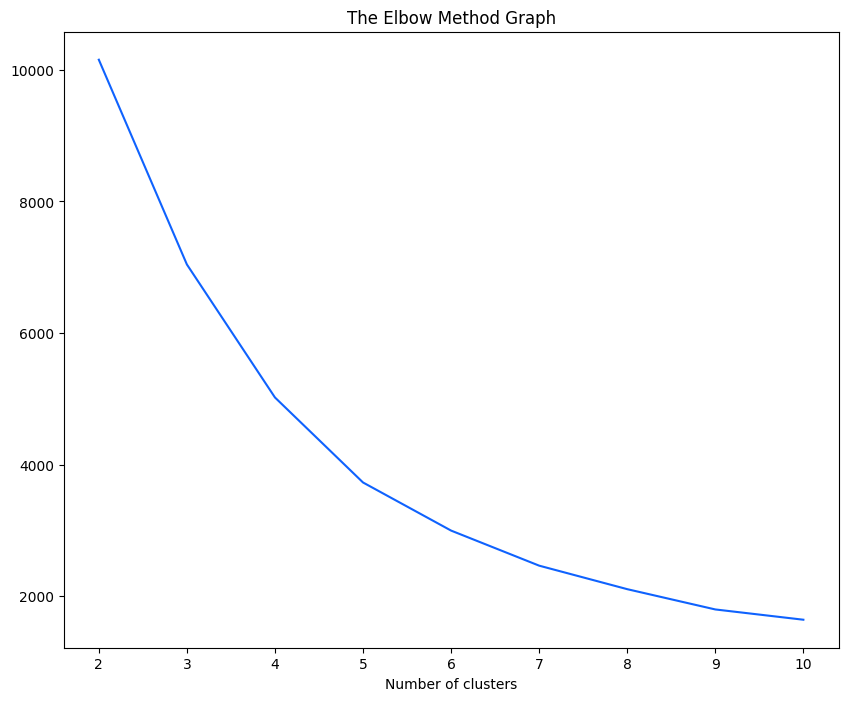

In [ ]:
#Show visual
plt.rcParams["figure.figsize"]=(10,8)
plt.plot(range(2,11,1),the_scores,color='#0f62fe')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.xticks(ticks=range(2,11))
plt.show()

In [ ]:
#calculating the silhouette_score
silhouette_scores = []
for i in range (2,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=50,verbose=0)
  kmeans.fit(RFMTable_df_scaled)
  silhouette = silhouette_score(RFMTable_df_scaled,kmeans.labels_)
  silhouette_scores.append(silhouette)
  print("for {} clusters the silhouette_score is {}".format(i,silhouette))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



for 2 clusters the silhouette_score is 0.42644179897867507
for 3 clusters the silhouette_score is 0.4456276029477114
for 4 clusters the silhouette_score is 0.4611804163538686
for 5 clusters the silhouette_score is 0.463463518875878
for 6 clusters the silhouette_score is 0.4659982299040198
for 7 clusters the silhouette_score is 0.46286391765476564
for 8 clusters the silhouette_score is 0.4229827193671261
for 9 clusters the silhouette_score is 0.4035736410495379
for 10 clusters the silhouette_score is 0.4039749102726147


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



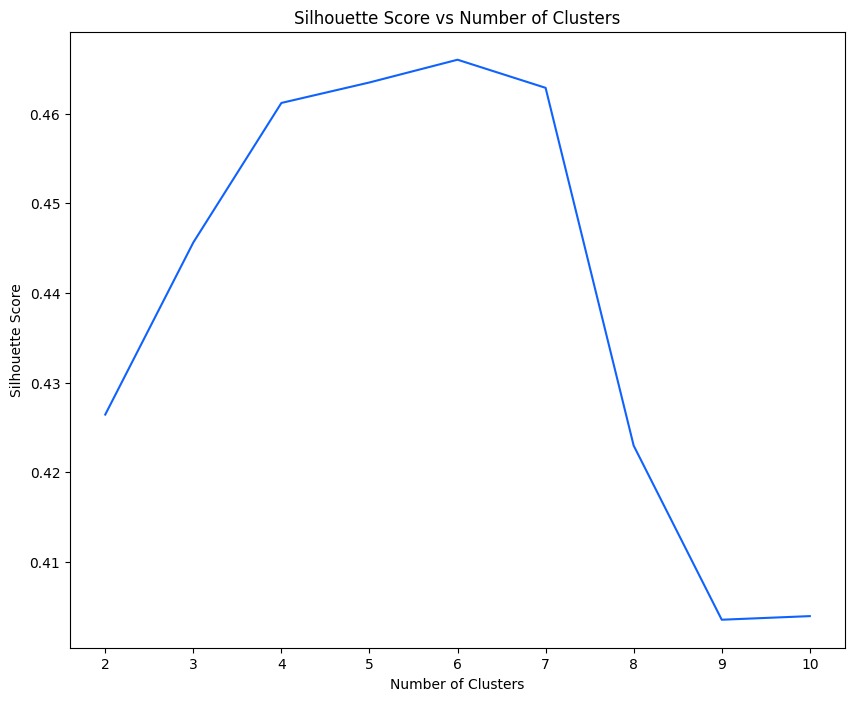

In [ ]:
#Show silhouette_scores plot
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), silhouette_scores, color='#0f62fe')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++',n_init=10,max_iter=50,verbose=0)
kmeans.fit(RFMTable_df_scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



KMeans(max_iter=50, n_clusters=4, n_init=10)

In [ ]:
RFMTable_df['Clusters']=kmeans.labels_

RFMTable_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Clusters
0,12346,326,1,77183.60,1,1,4,6,3
1,12747,2,9,3489.74,4,4,4,12,2
2,12748,1,171,28125.57,4,4,4,12,3
3,12749,4,5,4040.88,4,4,4,12,2
4,12820,3,4,942.34,4,3,3,10,2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



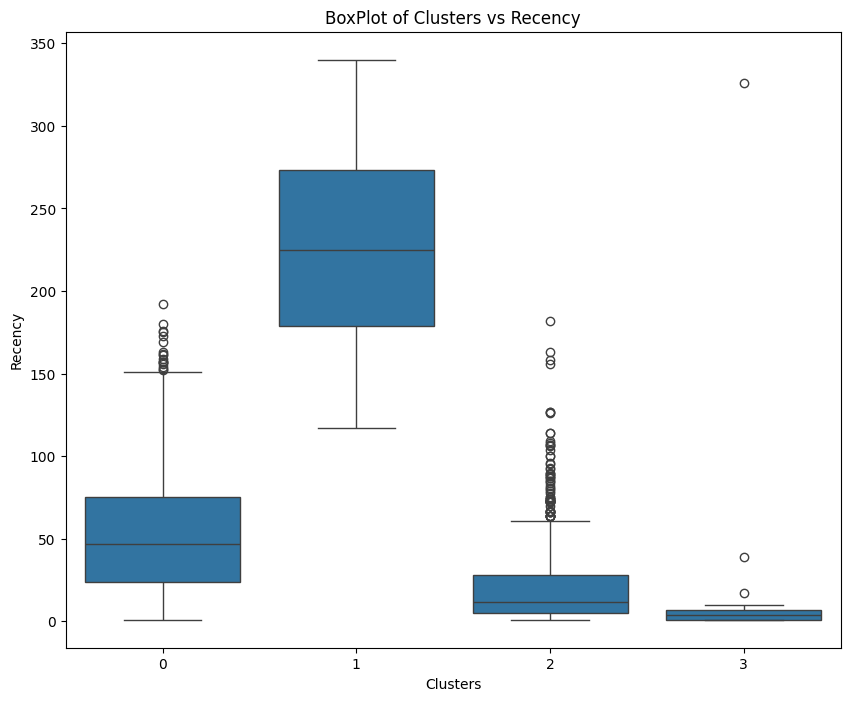

In [ ]:
sns.boxplot( x= 'Clusters',y= 'Recency' ,data=RFMTable_df)
plt.rcParams["figure.figsize"] = (10,8)
plt.title("BoxPlot of Clusters vs Recency")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



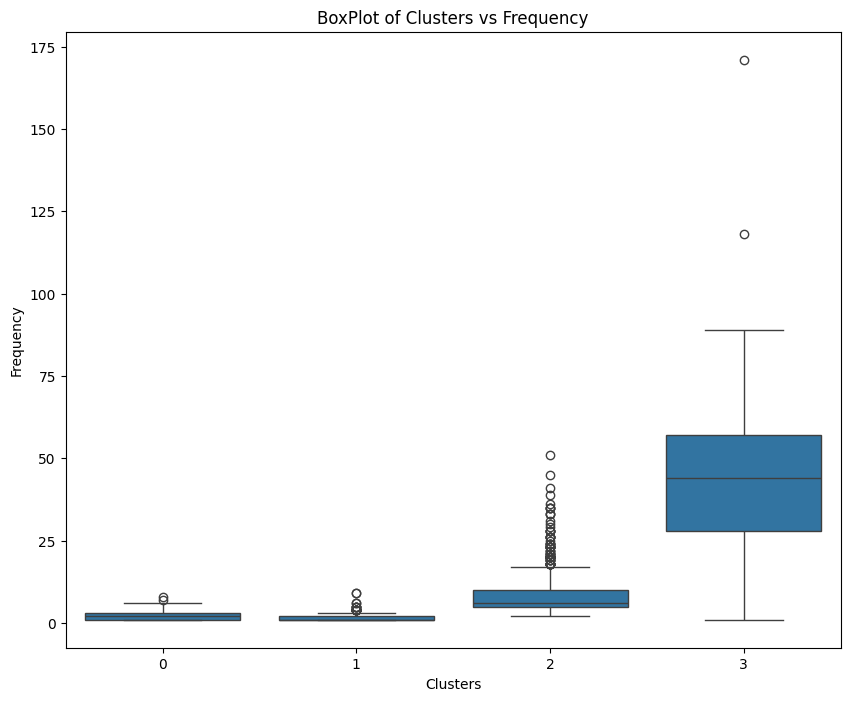

In [ ]:
sns.boxplot( x= 'Clusters',y= 'Frequency' ,data=RFMTable_df)
plt.rcParams["figure.figsize"] = (10,8)
plt.title("BoxPlot of Clusters vs Frequency")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



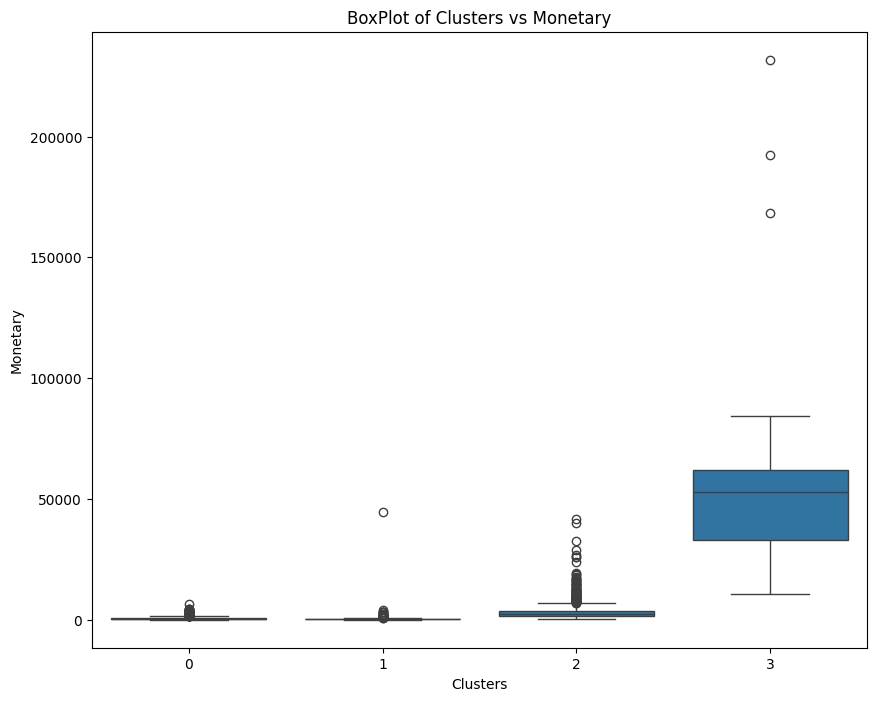

In [ ]:
sns.boxplot( x= 'Clusters',y= 'Monetary' ,data=RFMTable_df)
plt.rcParams["figure.figsize"] = (10,8)
plt.title("BoxPlot of Clusters vs Monetary")
plt.show()

In [ ]:
RFMTable_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  3808 non-null   object  
 1   Recency     3808 non-null   int64   
 2   Frequency   3808 non-null   int64   
 3   Monetary    3808 non-null   float64 
 4   R           3808 non-null   category
 5   F           3808 non-null   category
 6   M           3808 non-null   category
 7   RFM_Score   3808 non-null   int64   
 8   Clusters    3808 non-null   int32   
dtypes: category(3), float64(1), int32(1), int64(3), object(1)
memory usage: 175.5+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
temp_df = RFMTable_df[["Clusters", "RFM_Score", "Recency", "Frequency", "Monetary"]].groupby("Clusters").agg(["mean"])
temp_df.columns = ["RFM_Score mean", "Recency mean", "Frequency mean", "Monetary mean"]

# Add the customer count for each cluster
temp_df["Customer count"] = RFMTable_df.groupby("Clusters").size()
temp_df = temp_df.sort_values(by="RFM_Score mean", ascending=False)
#temp_df.index = [ "Platinum","Gold", "Silver", "Bronze"]
temp_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,RFM_Score mean,Recency mean,Frequency mean,Monetary mean,Customer count
Clusters,,,,,
3,11.640000,18.280000,51.680000,63739.415600,25
2,11.031308,20.457643,8.295580,3333.405285,1086
0,6.911814,52.993344,2.075430,645.309486,1803
1,4.280761,227.640940,1.404922,431.158133,894


In [ ]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("RFM_Score", "Recency", "Frequency","Monetary"),
                    specs=specs
                    )
colors = ["#936BFF", "#FBE4FE", "#CBD0FE", "#4A44F2"]

fig.add_trace(
    go.Pie(values = temp_df['RFM_Score mean'], labels = temp_df.index,
    name = 'RFM_Score',marker=dict(colors=colors)),
    1, 1
)
fig.add_trace(
    go.Pie(values = temp_df['Recency mean'], labels = temp_df.index,
    name = 'Recency',marker=dict(colors=colors)),
    1, 2
)
fig.add_trace(
    go.Pie(values = temp_df['Frequency mean'], labels = temp_df.index,
    name = 'Frequency',marker=dict(colors=colors)),
    2, 1
)
fig.add_trace(
    go.Pie(values = temp_df['Monetary mean'], labels = temp_df.index,
    name = 'Monetary',marker=dict(colors=colors)),
    2, 2
)
fig.update_layout(height=800, width=1200, title_text=" ")
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# **Market Basket Analysis**

In [ ]:
MBA_df=df.copy()
MBA_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleRevenue,Date,Month,Year,Week of the Year,Day of Week,Time of Day,Hour
41448,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.5,2011-01-04,January,2011,1,Tuesday,Morning,10
41449,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5,2011-01-04,January,2011,1,Tuesday,Morning,10
41450,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5,2011-01-04,January,2011,1,Tuesday,Morning,10
41451,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,10.5,2011-01-04,January,2011,1,Tuesday,Morning,10
41452,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,12.5,2011-01-04,January,2011,1,Tuesday,Morning,10


In [ ]:
MBA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445183 entries, 41448 to 528195
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         445183 non-null  object        
 1   StockCode         445183 non-null  object        
 2   Description       445183 non-null  object        
 3   Quantity          445183 non-null  int64         
 4   InvoiceDate       445183 non-null  datetime64[ns]
 5   UnitPrice         445183 non-null  float64       
 6   CustomerID        445183 non-null  object        
 7   Country           445183 non-null  object        
 8   SaleRevenue       445183 non-null  float64       
 9   Date              445183 non-null  object        
 10  Month             445183 non-null  object        
 11  Year              445183 non-null  int32         
 12  Week of the Year  445183 non-null  UInt32        
 13  Day of Week       445183 non-null  object        
 14  Time 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
merged_df = pd.merge(MBA_df, RFMTable_df[['CustomerID', 'Clusters']], on='CustomerID', how='left')
merged_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleRevenue,Date,Month,Year,Week of the Year,Day of Week,Time of Day,Hour,Clusters
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.5,2011-01-04,January,2011,1,Tuesday,Morning,10,2.0
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5,2011-01-04,January,2011,1,Tuesday,Morning,10,2.0
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5,2011-01-04,January,2011,1,Tuesday,Morning,10,2.0
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,10.5,2011-01-04,January,2011,1,Tuesday,Morning,10,2.0
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,12.5,2011-01-04,January,2011,1,Tuesday,Morning,10,2.0


In [ ]:
MBA_cluster_3 = merged_df.loc[merged_df['CustomerID'].isin(merged_df.loc[merged_df['Clusters'] == 3, 'CustomerID'])]
MBA_cluster_3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleRevenue,Date,Month,Year,Week of the Year,Day of Week,Time of Day,Hour,Clusters
103,540014,21654,RIDGED GLASS FINGER BOWL,1,2011-01-04 11:34:00,1.45,14606,United Kingdom,1.45,2011-01-04,January,2011,1,Tuesday,Morning,11,3.0
104,540014,84499,BLACK FLOWER CANDLE PLATE,6,2011-01-04 11:34:00,0.85,14606,United Kingdom,5.10,2011-01-04,January,2011,1,Tuesday,Morning,11,3.0
105,540014,21661,VINTAGE GLASS TEA CADDY,1,2011-01-04 11:34:00,5.95,14606,United Kingdom,5.95,2011-01-04,January,2011,1,Tuesday,Morning,11,3.0
106,540014,21703,BAG 125G SWIRLY MARBLES,3,2011-01-04 11:34:00,0.42,14606,United Kingdom,1.26,2011-01-04,January,2011,1,Tuesday,Morning,11,3.0
107,540014,22274,FELTCRAFT DOLL EMILY,1,2011-01-04 11:34:00,2.95,14606,United Kingdom,2.95,2011-01-04,January,2011,1,Tuesday,Morning,11,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445144,581580,21351,CINAMMON & ORANGE WREATH,1,2011-12-09 12:20:00,6.75,12748,United Kingdom,6.75,2011-12-09,December,2011,49,Friday,Morning,12,3.0
445145,581580,22698,PINK REGENCY TEACUP AND SAUCER,1,2011-12-09 12:20:00,2.95,12748,United Kingdom,2.95,2011-12-09,December,2011,49,Friday,Morning,12,3.0
445146,581580,22567,20 DOLLY PEGS RETROSPOT,1,2011-12-09 12:20:00,1.45,12748,United Kingdom,1.45,2011-12-09,December,2011,49,Friday,Morning,12,3.0
445147,581580,79321,CHILLI LIGHTS,2,2011-12-09 12:20:00,5.75,12748,United Kingdom,11.50,2011-12-09,December,2011,49,Friday,Morning,12,3.0


In [ ]:
basket = (MBA_cluster_3.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
basket.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC HEART T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
540014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
540021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#one hot encoding
def encoder(x):
  if(x<=0):
           return 0
  if(x>=1):
          return 1
basket = basket.applymap(encoder)
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC HEART T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
540014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
540021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#remove transactions that have less than 2 product
basket=basket[(basket>0).sum(axis=1) >=2]
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC HEART T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
540014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
540021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
frequent_itemsets.head()

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()


In [ ]:
rules = rules.sort_values("lift",ascending=False).reset_index(drop= True)
rules.head()

In [ ]:
temp_df = rules.head(50).copy()
temp_df.head()

# **Product Recommendation**

In [ ]:
from numpy.lib.arraysetops import unique

product_catalog = list(unique(MBA_cluster_3['Description']))

In [ ]:
rules.head()

In [ ]:
def remove_from_list(y, item_to_search):
  newlist = list()
  for i in y:
    if i not in item_to_search:
      newlist.append(i)
  return newlist

In [ ]:
def search_list(item_to_search, list_to_search=rules['antecedents']):
    max_lift = 0
    item_to_recommend = ''
    for i, item in enumerate(list_to_search):
        if set(list(item_to_search)).issubset(set(list(item))):
            if rules['lift'][i] > max_lift:
                max_lift = rules['lift'][i]
                y = list(rules['antecedents'][i])
                x = remove_from_list(y, item_to_search)
                item_to_recommend = list(rules['consequents'][i]) + x
    if item_to_recommend == '':
        item_to_recommend = "There are no Product recommendations"
    return [", ".join(item_to_search), item_to_recommend]

# Create the DataFrame
result_df = pd.DataFrame(columns=['Product', 'Product Recommendation'])
for i in range(len(product_catalog)):
    results = search_list([product_catalog[i]])
    result_df = pd.concat([result_df, pd.DataFrame([results], columns=['Product', 'Product Recommendation'])], ignore_index=True)
result_df = result_df[result_df['Product Recommendation'] != "There are no Product recommendations"]

print(result_df)